## Оценка вероятностей в задаче классификации

В предыдущем уроке мы научились предсказывать метку класса, как знак от произведения вектора признаков на вектор весов:
\begin{equation*}
y = sign(\sum_{i=1}^N \theta_ix_i) = sign(X\Theta)
\end{equation*}

Мы узнали, что линейный классификатор строит разделяющую гиперплоскость в пространстве признаков:
\begin{equation*}
X\Theta = 0
\end{equation*}

НО! Мы учитывали только $sign(X\Theta)$

* Если $X\Theta > 0$, мы относили к классу 1,


* Если $X\Theta < 0$, относили к классу -1

Никак не учитывали то, насколько далеко объект попал от разделяющей гиперплоскости. А это достаточно важный параметр.

Если объект близко к разделяющей гиперплоскости, значит классификация не уверенная.

И наоборот, если он далеко, то классификаия должна быть уверенная.

Как определить расстояние от точки до разделяющей гиперплоскости?

**Расстояние от точки до гиперплоскости**:

Длина ортогональной проекции вектора $\overline{a}$ на вектор $\overline{b}$, считается по формуле:

\begin{equation*}
np_{\overline{b}}\overline{a} = \| \overline{a}\|cos(\widehat{ \overline{a},\overline{b}}) = \dfrac{(\overline{a}, \overline{b})}{\|\overline{b}\|}
\end{equation*}


Пусть требуется посчитать расстояние от точки $M^*$ до гиперплоскости.

Возьмем любую точку $M_0$ принадлежащую данной гиперплоскости.

Тогда расстояние от точки $M^*$ до гиперплоскости будет равно длине ортогональной проекции вектора $\overline{M_0M*}$ на вектор нормали $\overline{n}$.


\begin{equation*}
d = \dfrac{(M^* - M_0,\overline{n})}{\|\overline{n}\|} = \dfrac{(M^*,\overline{n})}{\|\overline{n}\|} - \dfrac{(M_0,\overline{n})}{\|\overline{n}\|} \\
d = \dfrac{(M^*,\overline{n}) + A_0}{\|\overline{n}\|} \\
\end{equation*}

![](gipyerploskostiM.jpg?raw=true)

В наших обозначениях, вектором нормали является вектор весов $\Theta$, а точкой - вектор признаков $X_i$, значит расстояние до разделяющей гиперплоскости будет равно:
\begin{equation*}
d = \dfrac{X_i\Theta}{\|\Theta\|}
\end{equation*}

Заметим, что произведение $X_i\Theta$ пропорцианально расстоянию от $i$-го объекта до разделяющей гиперплоскости, так как для всех объектов в выборке, вектор весов $\Theta$ одинаковый.
\begin{equation*}
d = \dfrac{X_i\Theta}{\|\Theta\|} \sim X_i\Theta
\end{equation*}

Итак, 

* если $X_i\Theta$ по модулю большое, классификация уверенная

* если $X_i\Theta$ по модулю маленькое, классификация неуверенная

Как можно обозначать степень уверенности, что объект принадлежит к классу?

Например вероятностью принадлежности к классам

Давайте попробуем предсказть *вероятности принадлежности к каждому классу*

У нас всего два класса:
* iris setosa 
* iris virginica

Будем пробовать предсказывать вероятность принадлежности классу *iris virginica*:

\begin{equation*}
P(y_i=iris\_virginica|X_i)
\end{equation*}
Тогда
\begin{equation*}
P(y_i=iris\_setosa|X_i) = 1 - P(y_i=iris\_virginica|X_i)
\end{equation*}

Так как вероятности распределены от 0 до 1, давайте и истинные метки классов сделаем 0 и 1
 * iris setosa 0
 * iris virginica 1

In [1]:
from classification_helper import *
import numpy as np

In [2]:
X, kind_iris = get_data()

In [3]:
y = kind_iris.copy()
y[y=='iris setosa'] = 0
y[y=='iris virginica'] = 1
y = y.astype(int)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Можем попробовать обучить линейную регрессию предсказывать метки 0 и 1:
\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2} - y_i)^2 = \operatorname*{argmin}_\Theta \sum_{i=1}^N (X_i\Theta - y_i)^2 \\
P(y_i=iris\_virginica|X_i) = X_i\Theta_{opt}
\end{equation*}

$X_i = \begin{pmatrix} 1&  x_{i,1} & x_{i,2}\end{pmatrix}$ - Вектор признаков $i$ - го объекта

$x_{i,1}$ - Длина чашелистника на $i$-ом объекте
 
$x_{i,2}$ - Ширина чашелистника на $i$-ом объекте
 
$y_i \in$ {0,1} - Истинная метка класса
 
$\Theta = \begin{pmatrix}\theta_0 &  \theta_1 & \theta_2\end{pmatrix}^T$- параметры модели (веса)


Тогда финальное решение о метке класса можно отбирать по порогу $p_0$:
\begin{equation*}
 y_i = 
 \begin{cases}
   iris\_virginica, &\text{$X_i\Theta \geqslant p_0$}\\
   iris\_setosa, &\text{$X_i\Theta < p_0$}\\
 \end{cases}
\end{equation*}

$p_0$ можно взять, например $p_0 = 0.5$

Но $X_i\Theta$ не обзятельно будет лежать в интервале [0,1], $X_i\Theta \in \mathbb{R}$, это очень странно для вероятности.

Чтобы выход модели принимал значение от 0 до 1, можем взять функцию от выхода модели $X_i\Theta$:

\begin{equation*}
f: \mathbb{R}\rightarrow [0,1] 
\end{equation*}

Для подобных целей в машинном обучении принято брать функцию **сигмоида**:



\begin{equation*}
\sigma(t) = \dfrac{1}{1+e^{-t}}
\end{equation*}


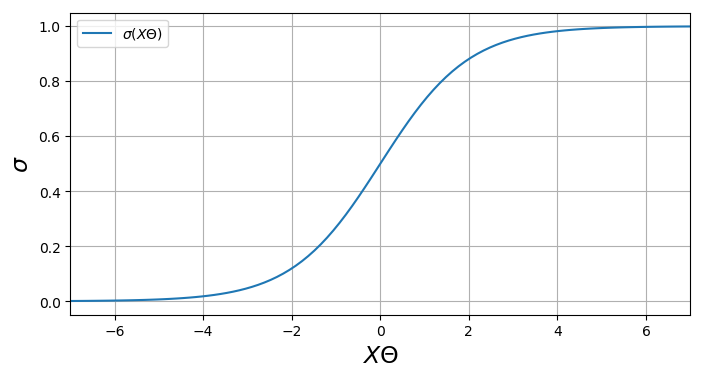

In [4]:
plot_sigmoid()

Тогда модель классификации примит следующий вид:
\begin{equation*}
P(y=iris\_virginica|X) = \sigma(\theta_0 + \theta_1 x_1 + \theta_2 x_2)\\
P(y=iris\_virginica|X) = \sigma(X\Theta) \\
y = 
 \begin{cases}
   iris\_virginica, &\text{$\sigma(X_i\Theta) \geqslant p_0$}\\
   iris\_setosa, &\text{$\sigma(X_i\Theta) < p_0$}\\
 \end{cases}
\end{equation*}


\begin{equation*}
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum_{i=1}^N(\sigma(\theta_0 +  \theta_1x_{i,1} + \theta_2x_{i,2}) - y_i)^2 = \\ =\operatorname*{argmin}_\Theta \sum_{i=1}^N (\sigma(X_i\Theta) - y_i)^2 \\
\end{equation*}

*MSE* хорошо оценивает среднее значение, для вероятностей это не совсем подходит

Обозначим за $\tilde p(X)$ вероятность принадлежности к классу 1.

$\tilde p(X)=P(y=iris\_virginica|X) = \sigma(X\Theta)$

Рассмотрим следующую функцию:
\begin{equation*}
L = \prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}
\end{equation*}

Замети, что чем ближе $\tilde p(X_i)$ к истиным ответам $y_i$, тем болеше значение $L$.

В матеиматичесской статистике $L$ называют функцией правдоподобия.

Так как функция $L$ представляет собой произведение, искать ее производную затруднительно.

Для максимизации правдоподобия обычно берут логарифм от $L$, так как логарифм монотонно возрастает, значит максимум логарифма сопадает с максимумом аргумента

\begin{equation*}
\Theta_{opt} = \operatorname*{argmax}_\Theta \prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}\\
\Theta_{opt} = \operatorname*{argmax}_\Theta \ln(\prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}) \\
\Theta_{opt} = \operatorname*{argmax}_\Theta \ln(\prod\limits_{i = 1}^N\tilde p(X_i)^{y_i}(1-\tilde p(X_i))^{(1-y_i)}) \\
\Theta_{opt} = \operatorname*{argmax}_\Theta \sum\limits_{i = 1}^N\ln\tilde p(X_i)^{y_i} + \ln((1-\tilde p(X_i))^{(1-y_i)})\\
\Theta_{opt} = \operatorname*{argmax}_\Theta \sum\limits_{i = 1}^N y_i\ln(\tilde p(X_i) + (1-y_i)\ln(1-\tilde p(X_i))
\end{equation*}

Но так как мы уже привыкли минимизировать функцию ошибки, 

возьмем $\tilde L = -\ln(L)$ и будем минимизировать $\tilde L$

\begin{equation*}
\tilde L = -\ln(L)\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \tilde L\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum\limits_{i = 1}^N -y_i\ln(\tilde p(X_i) - (1-y_i)\ln(1-\tilde p(X_i))\\
\Theta_{opt} = \operatorname*{argmin}_\Theta \sum\limits_{i = 1}^N -y_i\ln(\sigma(X_i\Theta)) - (1-y_i)\ln(1 -\sigma(X_i\Theta))
\end{equation*}

Функцию ошибки $\tilde L$ еще можно переписать в следующем виде:
\begin{equation*}
\tilde L = \sum\limits_{i = 1}^N -y_i\ln(\sigma(X_i\Theta)) - (1-y_i)\ln(1 -\sigma(X_i\Theta))\\
\tilde L = \sum\limits_{i = 1}^N L_i \\
\tilde L_i  = 
 \begin{cases}
   -\ln(\sigma(X_i\Theta)), &y_i=1\\
  \ln(1 -\sigma(X_i\Theta)), &y_i=0\\
 \end{cases} \\
\end{equation*}

Функцию ошибки $\tilde L$ называют **кросс-энтропия (сross entropy)**.

Почему такая функция ошибки оптимальнее *MSE*?

* Рассмотрим пример, когда истинный класс $y$ = 1

Тогда ошибка *MSE*:

* $L_{mse} = (1 - sogmoid(X\Theta))^2$

Ошибка на *кросс-энтропии*:

* $L_{ce} = -\ln(\sigma(X\Theta))$

Возьмем производные от ошибок по вектору весов $\Theta$:

* $\dfrac{\partial L_{mse}}{\partial\Theta} = -2(1 - \sigma(X\Theta))\dfrac{\partial \sigma(X\Theta)}{\partial\Theta} =  - 2(1 - \sigma(X\Theta)) * DS$


* $\dfrac{\partial L_{ce}}{\partial\Theta} = \dfrac{-1}{\sigma(X\Theta)}\dfrac{\partial \sigma(X\Theta)}{\partial\Theta}  = \dfrac{-1}{\sigma(X\Theta)} * DS$



* $DS = \dfrac{\partial \sigma(X\Theta)}{\partial\Theta}$

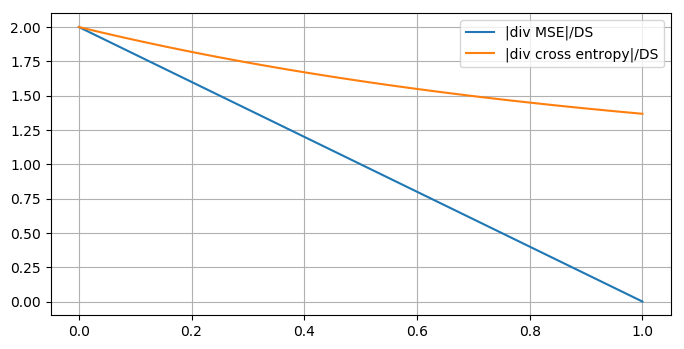

In [5]:
plot_div_mse_ce()

Как видим из графика, абсолютное значекние функции ошибки *cross entropy* больше, чем у *MSE*

*cross entropy*  сильнее штрафует за неправильный ответ, поэтому лучше обновляет веса при градиантном спуске

Если переобозначить метку класса 0 за -1, то кросс-энтропия примит знакомый нам вид:
\begin{equation*}
\tilde L = \sum_{i=1}^N ln(1 + e^{-y_i \cdot X_i\Theta})
\end{equation*}

Оптимизируя кросс энтропию, мы оптимизируем логистичесскую функцию потерь.

Линейная модель, которой мы предсказываем вероятность принадлежности к классам с

логистичесской функцие потерь, называется **Логистичесская регрессия (Logistic regression)**.

Соберем все вместе и обучим *логистическую регрессию* предсказывать вид цветка Ириса

Но сначала, нам нужно научиться брать производную от *сигмоиды*
\begin{equation*}
\sigma(t) = \dfrac{1}{1+e^{-t}} \\ \\
\dfrac{d \sigma(t)}{dt} = \dfrac{e^{-t}}{(1+e^{-t})^2} = \dfrac{e^{-t}+1-1}{(1+e^{-t})^2} = \\
\dfrac{1}{1+e^{-t}} - \dfrac{1}{(1+e^{-t})^2} = \\
\sigma(t)(1-\sigma(t))\\
\dfrac{d \sigma(t)}{dt} = \sigma(t)(1-\sigma(t))
\end{equation*}

Производная функции ошибки:
\begin{equation*}
\tilde L = -\sum\limits_{i = 1}^N y_i\ln(\sigma(X_i\Theta)) + (1-y_i)\ln(1 -\sigma(X_i\Theta)) \\
\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j} = -\sum\limits_{i = 1}^Ny_i\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta)}{\sigma(X_i\Theta)}x_{i,j} - (1-y_i)\dfrac{\sigma(X_i\Theta)(1-\sigma(X_i\Theta))}{1-\sigma(X_i\Theta)}x_{i,j} = \\
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j} 
\end{equation*}

Интересное замечание:
* $y_i=1$, штраф равен вероятности нулевого класса
* $y_i=0$, штраф равен вероятности первого класса

Суммарная ошибка равна сумме вероятностей противоположных классов

Теперь у нас все готово для реализации *Логистичесской регресии*

Как всегда добавим единицу первым столбцом в данные

In [6]:
def create_data(X):
    X_ones = np.ones(X.shape[0])
    return np.column_stack([X_ones, X])

X_train = create_data(X)

Напишем функцию сигмоида \begin{equation*}
\sigma(x) = \dfrac{1}{1+e^{-x}}
\end{equation*}



In [7]:
def sigmoid(x):
    return 1/(1+np.e**(-x))

Зададим начальные параметры весов случайными значениями от 0 до 1:

In [8]:
Theta = np.random.random_sample(size=(X_train.shape[1],))
print(Theta)

[0.91716873 0.34665888 0.12436802]


Подсчет градианта:
$\dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}
= -\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j}$

In [9]:
def gradient_function(Theta, X, y):
    grad = np.zeros_like(Theta)
    for j in range(Theta.shape[0]):       
        grad[j] = -sum(y*(1-sigmoid(X@Theta))*X[:,j] - (1-y)*sigmoid(X@Theta)*X[:,j])
    return grad

Градиентный спуск: 

$\theta_{j_{new}} = \theta_j - \alpha \dfrac{\partial \tilde L(\Theta)}{\partial \theta_j}$  
$\theta_{j_{new}} = \theta_j - \alpha (-\sum\limits_{i = 1}^Ny_i(1-\sigma(X_i\Theta))x_{i,j} - (1-y_i)\sigma(X_i\Theta)x_{i,j})$

In [10]:
def gradient_descent(Theta, X, y, alpha, iters):        
    theta = Theta
    for i in range (iters):
        theta = theta - alpha * gradient_function(theta, X, y)
    return theta

In [11]:
theta_opt = gradient_descent(Theta, X_train, y, 0.01, 1000)
theta_opt

array([ -3.41153302,   6.47081803, -10.530282  ])

In [12]:
def predict_function(X_train, theta):
    y_pred = np.dot(X_train, theta) #X @ Theta
    return sigmoid(y_pred)

y_pred = predict_function(X_train, theta_opt)
y_pred

array([6.98171011e-04, 3.57303442e-02, 1.23482469e-03, 1.85198362e-03,
       1.27603127e-04, 7.21121815e-05, 7.87834452e-05, 1.04739451e-03,
       4.16132603e-03, 1.27625073e-02, 5.92149521e-04, 2.87337620e-04,
       1.90313575e-02, 7.62716237e-04, 3.34708279e-04, 2.59710383e-06,
       7.21121815e-05, 6.98171011e-04, 1.43817395e-03, 2.96673829e-05,
       1.37608066e-02, 8.50314386e-05, 9.58995010e-06, 5.70726540e-03,
       2.87337620e-04, 6.60945522e-02, 1.04739451e-03, 1.33263141e-03,
       3.81026853e-03, 1.23482469e-03, 6.72296271e-03, 1.37608066e-02,
       2.40625762e-06, 5.84909210e-06, 1.27625073e-02, 8.54061239e-03,
       9.21175125e-03, 6.68134140e-05, 1.45574643e-03, 1.99857581e-03,
       3.65664028e-04, 8.15702666e-01, 1.77415961e-04, 3.65664028e-04,
       2.96673829e-05, 1.90313575e-02, 2.96673829e-05, 6.46899510e-04,
       3.10120064e-04, 2.99630841e-03, 9.31162808e-01, 9.96623220e-01,
       9.99982273e-01, 9.98905981e-01, 9.99140189e-01, 9.99999303e-01,
      

Давайте опять посмотрим на долю неверных ответов, но теперь нам нужен порог $p_0$, преодалев который мы будем считать, что классификатор присвоил объект к классу $1$.

In [13]:
def error(y, y_pred, p=0.5):
    return np.mean((y_pred > p).astype(int) != y)

In [14]:
P = np.linspace(0,1,11)
for p in P:
    p = round(p,1)
    err = error(y, y_pred, p=p)
    print("Порог = {}, доля неверных ответов = {}".format(p, err))

Порог = 0.0, доля неверных ответов = 0.5
Порог = 0.1, доля неверных ответов = 0.01
Порог = 0.2, доля неверных ответов = 0.01
Порог = 0.3, доля неверных ответов = 0.01
Порог = 0.4, доля неверных ответов = 0.01
Порог = 0.5, доля неверных ответов = 0.01
Порог = 0.6, доля неверных ответов = 0.01
Порог = 0.7, доля неверных ответов = 0.01
Порог = 0.8, доля неверных ответов = 0.02
Порог = 0.9, доля неверных ответов = 0.03
Порог = 1.0, доля неверных ответов = 0.5


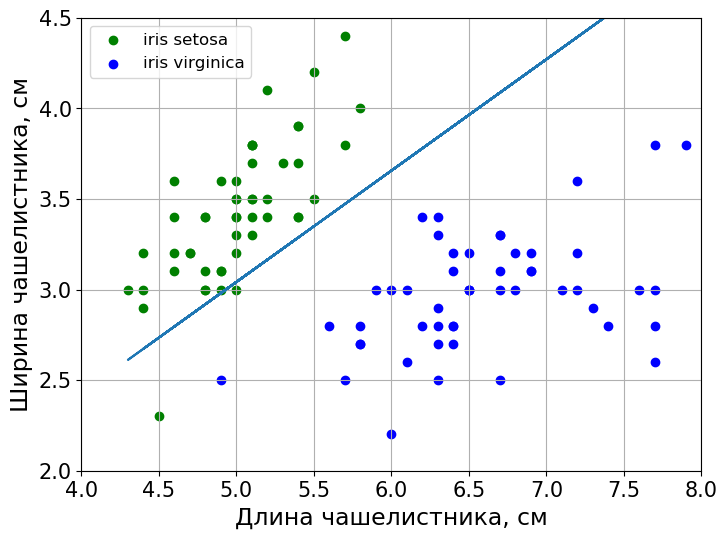

In [15]:
plot_finaly_trained_model(X, kind_iris, theta_opt)

Чтобы всякий раз не писать градиентный спуск в ручную, логистичесская регрессия есть в библиотеке scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()
clf.fit(X,y)
y_pred_sklearn = clf.predict(X)
y_pred_sklearn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Метод predict возвращает метки классов по порогу 0.5, чтобы получить вероятности классов, нужно вызвать метод predict_proba

In [18]:
y_pred_prob_sklearn = clf.predict_proba(X)
y_pred_prob_sklearn

array([[9.23308026e-01, 7.66919740e-02],
       [8.81361315e-01, 1.18638685e-01],
       [9.56051150e-01, 4.39488503e-02],
       [9.59769824e-01, 4.02301759e-02],
       [9.53707003e-01, 4.62929975e-02],
       [9.19364723e-01, 8.06352767e-02],
       [9.78947100e-01, 2.10529000e-02],
       [9.29593187e-01, 7.04068131e-02],
       [9.66322201e-01, 3.36777987e-02],
       [9.02721793e-01, 9.72782066e-02],
       [8.79620140e-01, 1.20379860e-01],
       [9.61206932e-01, 3.87930677e-02],
       [9.10530582e-01, 8.94694184e-02],
       [9.80039909e-01, 1.99600914e-02],
       [8.01742184e-01, 1.98257816e-01],
       [9.30976172e-01, 6.90238276e-02],
       [9.19364723e-01, 8.06352767e-02],
       [9.23308026e-01, 7.66919740e-02],
       [7.80238298e-01, 2.19761702e-01],
       [9.59126028e-01, 4.08739723e-02],
       [7.89426963e-01, 2.10573037e-01],
       [9.49457424e-01, 5.05425764e-02],
       [9.86404774e-01, 1.35952264e-02],
       [8.85264508e-01, 1.14735492e-01],
       [9.612069

Так как классификация бинарная, первым столбцом predict_proba вернул вероятность нулевого класса, а вторым вероятность первого

Параметры модели $\Theta$ хранятся в поле intercept_ ($\theta_0$) и coef_ ($\theta_1, \theta_2$)

In [19]:
print(clf.intercept_, clf.coef_)

[-10.75428623] [[ 3.14745566 -2.22454385]]


### Вывод
1. Помимо предсказания метки класса, мы научились оценивать уверенность такого предсказания, как вероятность принадлежности первому классу:
\begin{equation*}
P(y=1|X) = \sigma(X\Theta), \\
P(y=0|X) = 1 - \sigma(X\Theta).
\end{equation*}
2. Решение о том, относим мы объект к классу $1$ принимается по заданному порогу $p_0$, если ответ классифкатора $\tilde p(X)=\sigma(X\Theta) > p_0$, ставим метку класса $1$, иначе $0$
3. Для обучения классификатора мы выбрали функцию ошибки *cross entropy*, т.к она сильнее штрафует за неправильный ответ, чем *MSE* в задаче классификации.